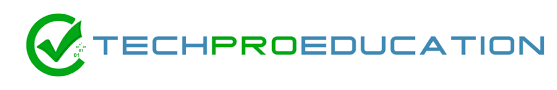

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;
warnings.filterwarnings('ignore')

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df = pd.read_csv('store_sharing.csv')

<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [3]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


In [4]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
df.shape

(17414, 10)

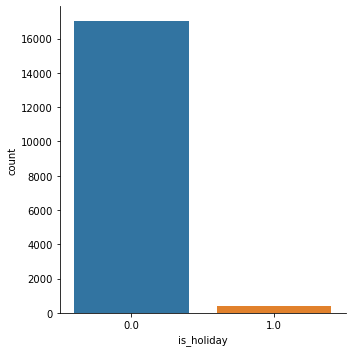

In [6]:
df.is_holiday.value_counts()
sns.factorplot(x='is_holiday',data=df,kind='count',size=5,aspect=1);





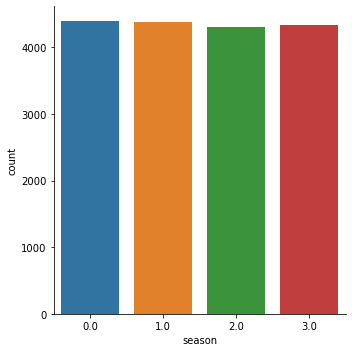

In [7]:
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1);

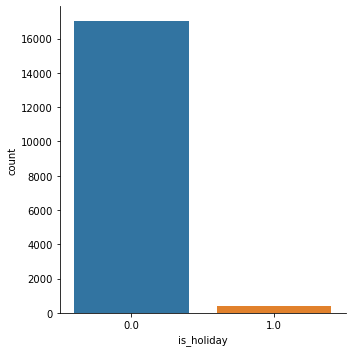

In [8]:
sns.factorplot(x='is_holiday',data=df,kind='count',size=5,aspect=1);

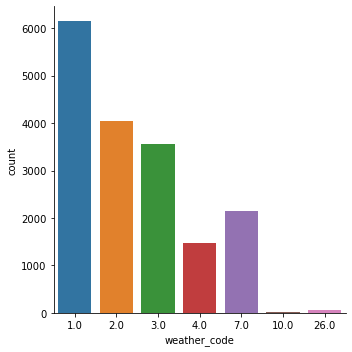

In [9]:
sns.factorplot(x='weather_code',data=df,kind='count',size=5,aspect=1);

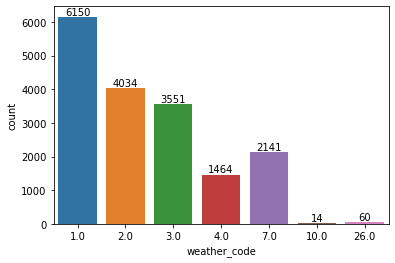

In [10]:
ax = sns.countplot(x='weather_code',data=df)
ax.bar_label(ax.containers[0]);

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [11]:
df['timestamp'].dtype
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index(keys='timestamp',inplace=True)

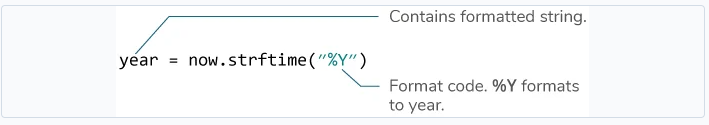

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

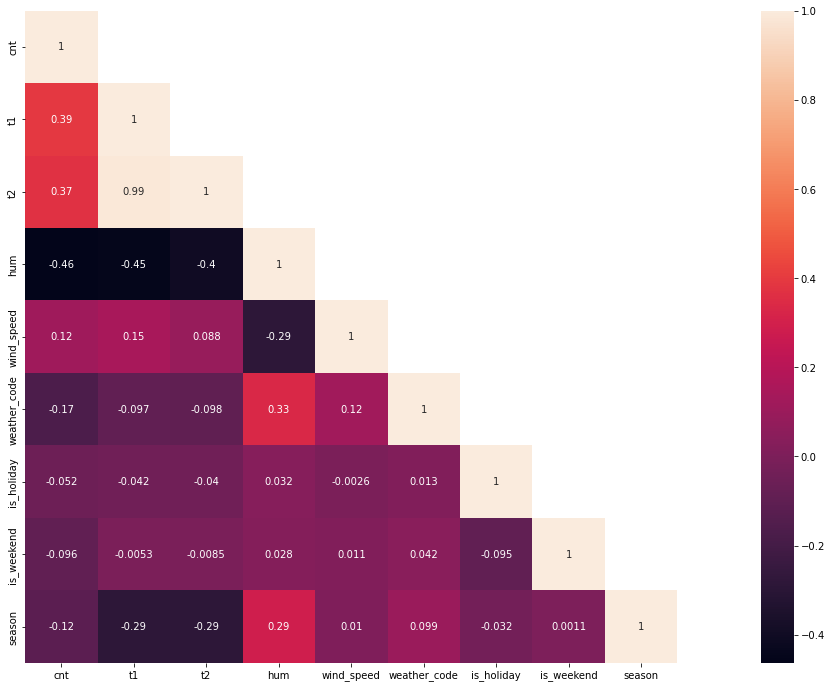

In [12]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True);

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

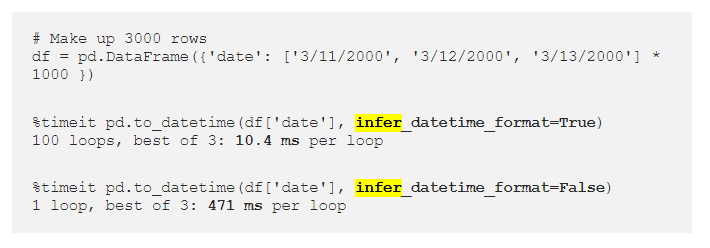

In [17]:
from datetime import datetime
df.index=df.index.astype('datetime64[ns]')
df['year_month']=df.index.strftime('%Y-%m')
df['year']=df.index.year   #df['year_month']=df.index.to_period('M')                    
df['month']=df.index.month
df['day_of_month']=df.index.day
df['day_of_week']=df.index.dayofweek
df['hour']=df.index.hour

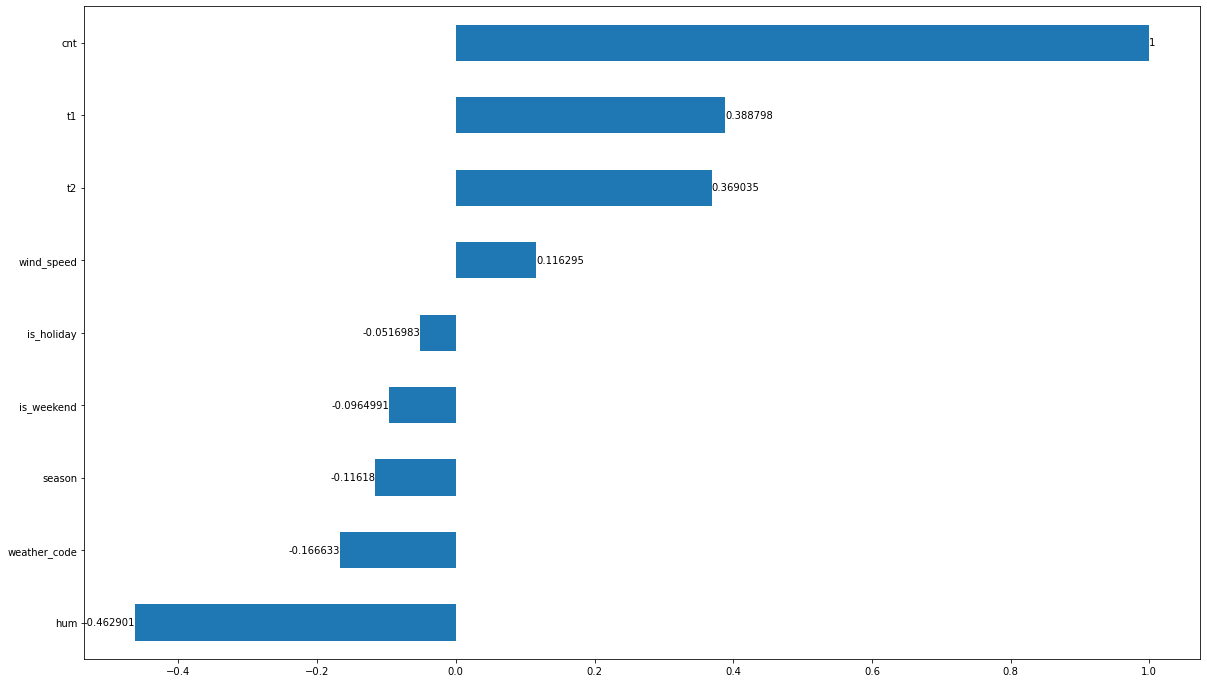

In [13]:
plt.figure(figsize=(20,12))
ax = df.corr()['cnt'].sort_values().plot.barh()
ax.bar_label(ax.containers[0]);

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

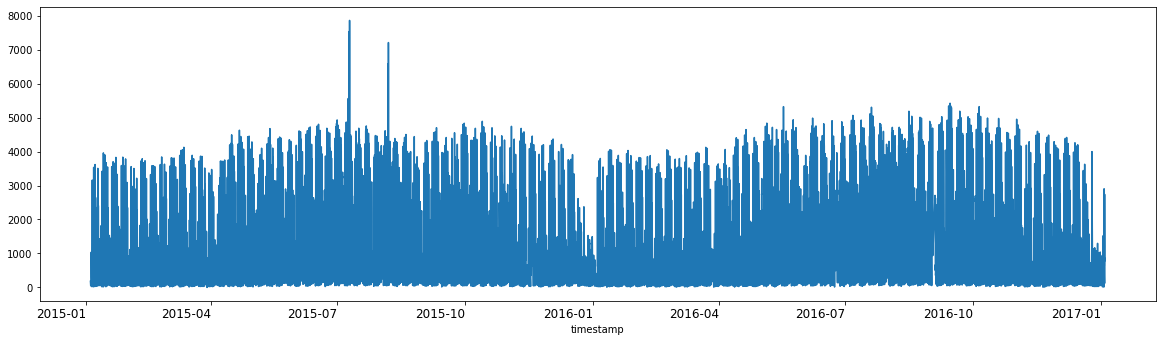

In [14]:
ax = df.plot.line( y='cnt', figsize=(20, 6), legend=False, )
plt.xticks(rotation=0, size = 12);

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [18]:
df.groupby('year_month')[['cnt']].sum()

,cnt
year_month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

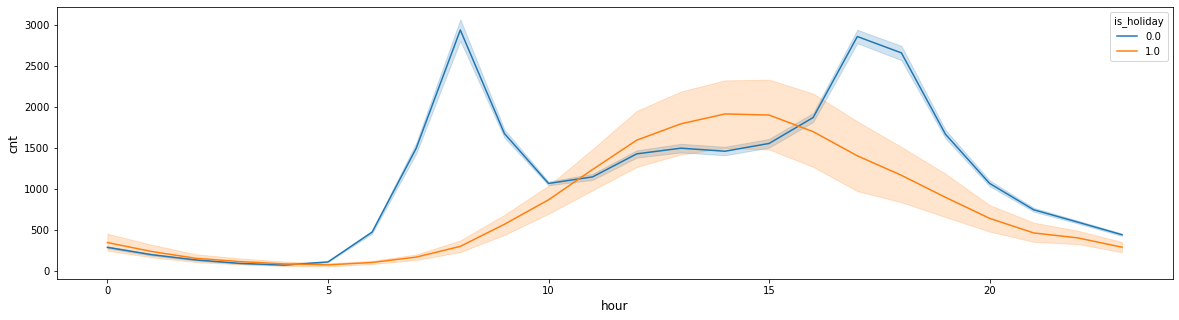

In [19]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x = 'hour', y = 'cnt', hue="is_holiday")
plt.xlabel('hour', size = 12)
plt.ylabel('cnt',size = 12);

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

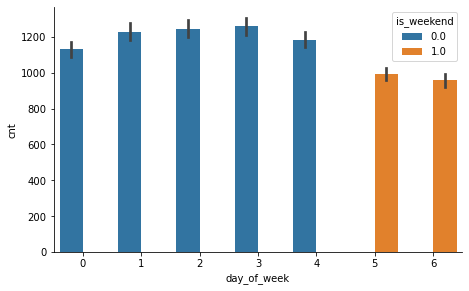

In [20]:
g =sns.catplot(data=df, x = 'day_of_week', y = 'cnt', hue = 'is_weekend' , kind = 'bar', legend_out=False, palette='tab10')
g.fig.set_figwidth(7)
g.fig.set_figheight(4);

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

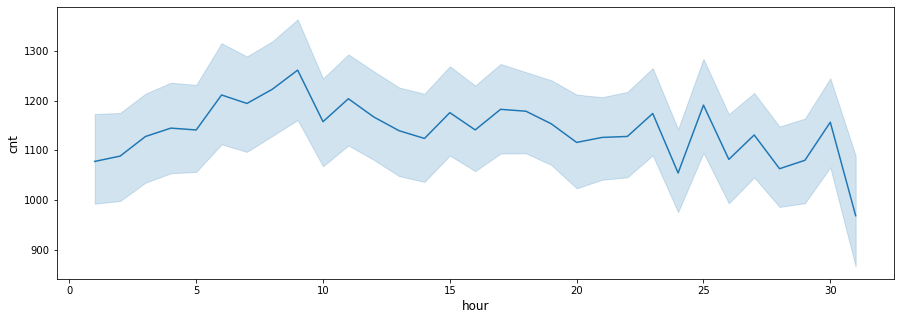

In [21]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x = 'day_of_month', y = 'cnt')
plt.xlabel('hour', size = 12)
plt.ylabel('cnt',size = 12);

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

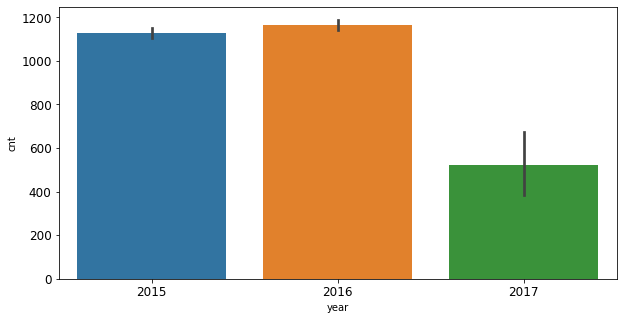

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x = 'year', y = 'cnt', palette='tab10')
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

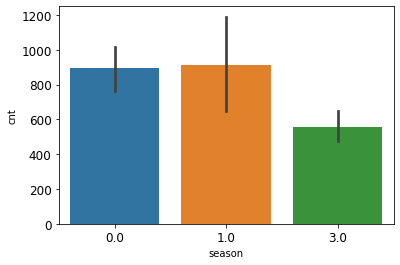

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(data=df[df.is_holiday == 1 ][['cnt','season']], x = 'season', y = 'cnt', palette='tab10')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

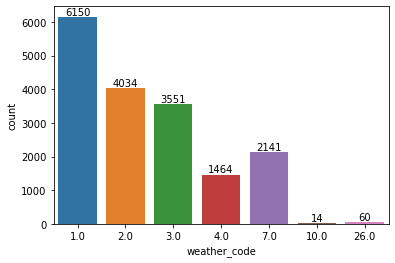

In [25]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'weather_code', data = df, palette='tab10')
ax.bar_label(ax.containers[0]);

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

In [ ]:
Data visualization has a great importance to get insights from data. As my first visualization project ended, I hope it is useful for everybody.

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

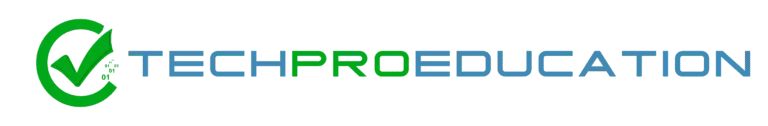